# Hypothesis testing with firearm licenses

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

<ipython-input-7-b9e5de403f6f>:2: DtypeWarning: Columns (1,2,3,4,6,12,17) have mixed types. Specify dtype option on import or set low_memory=False.
  licensees = pd.read_csv("/content/federal-firearm-licensees.csv")


<Axes: ylabel='Frequency'>

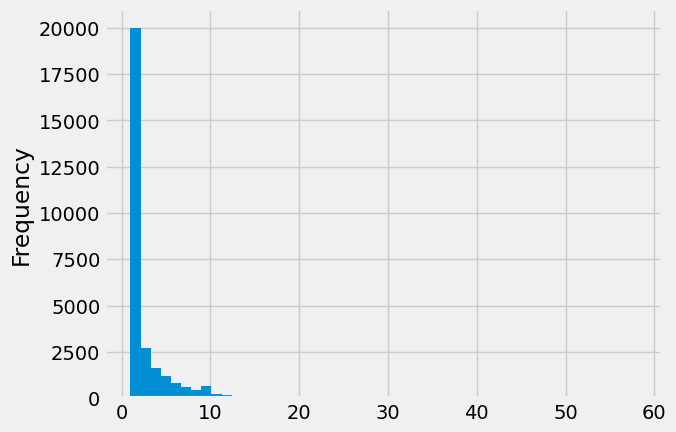

In [7]:
plt.style.use('fivethirtyeight')
licensees = pd.read_csv("/content/federal-firearm-licensees.csv")
licensees['Premise Zip Code'].value_counts().plot.hist(bins=50)

In [8]:
licensees['Premise Zip Code'].value_counts().mean()

2.756617394293572

In [9]:
X = licensees['Premise Zip Code'].value_counts()

In [11]:
def t_value(X, h_0):
    se = np.sqrt(np.var(X) / len(X))
    return (np.mean(X) - h_0) / se

def p_value(t):
    # Two-sided p-value, so we multiply by 2.
    return stats.norm.sf(abs(t))*2

t = t_value(X, 2.75)
p = p_value(t)

In [12]:
t, p

(0.35702376432918465, 0.7210740152174941)

In [13]:
import scipy.stats as stats

stats.ttest_1samp(a=X, popmean=2.75)

TtestResult(statistic=0.35701762773873, pvalue=0.7210811989731936, df=29089)

<Axes: >

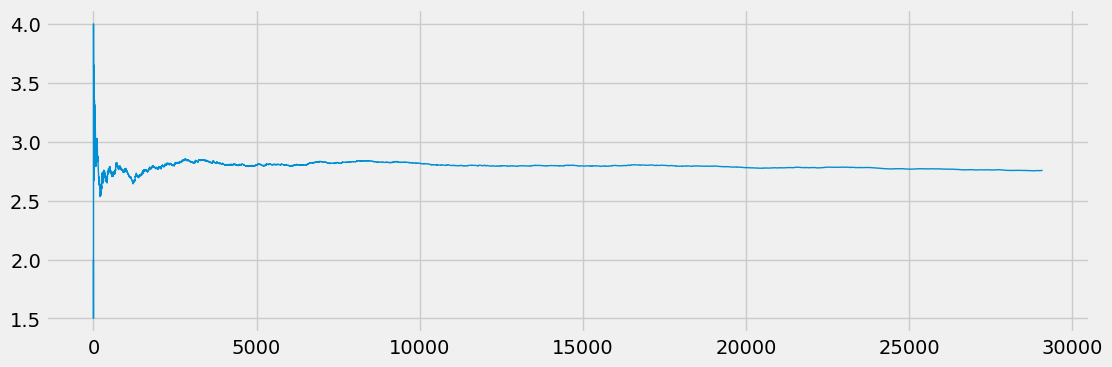

In [14]:
r = (licensees['Premise Zip Code']
         .value_counts()
         .sample(len(licensees['Premise Zip Code'].unique()) - 1))
pd.Series(r.cumsum() / np.array(range(1, len(r) + 1))).reset_index(drop=True).plot.line(
    figsize=(12, 4), linewidth=1
)